<a href="https://colab.research.google.com/github/Dyinastie/PVCK_3D_Dyinastie/blob/main/PCVK_Jobsheet10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **Threshold**

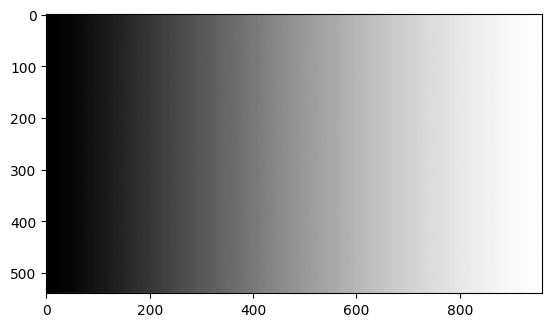

In [ ]:
original = cv2.imread('/content/drive/MyDrive/Images/Gradient.jpg')
orignal = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
plt.imshow(orignal, cmap='gray')

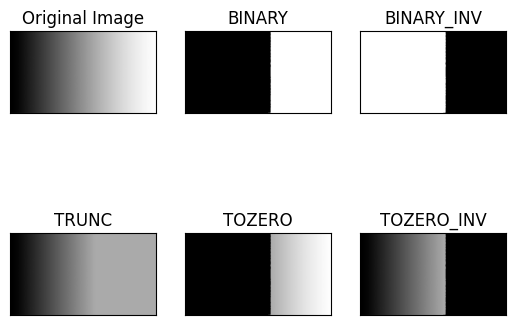

In [ ]:
ret,thresh1 = cv2.threshold(original,170,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(original,170,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(original,170,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(original,170,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(original,170,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
hasil = [original, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(hasil[i],'gray',vmin=0,vmax=255)  # vmin vmax untuk mengatur jangkauan intensitas piksel
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) # menyembunyikan label sumbu x dan sumbu y

plt.show()

# **Otsu Thresholding**

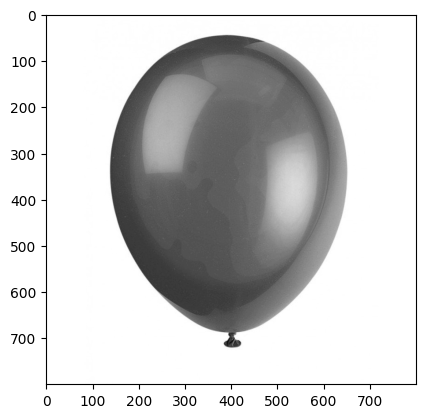

In [ ]:
balloons = cv2.imread('/content/drive/MyDrive/Images/Balloon.jpg',0)
plt.imshow(balloons, cmap='gray')

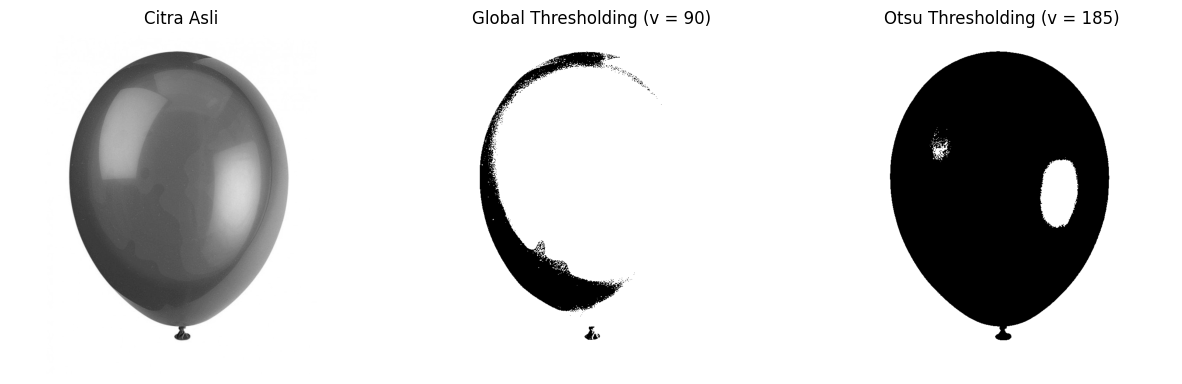

In [ ]:
# Global Thresholding dengan nilai threshold 90
_, global_thresh = cv2.threshold(balloons, 90, 255, cv2.THRESH_BINARY)

# Fungsi untuk menghitung Otsu's Threshold secara manual
def otsu_threshold(image):
    # Menghitung histogram
    hist, bins = np.histogram(image.ravel(), 256, [0, 256])

    # Total jumlah piksel
    total_pixels = image.size

    # Variabel untuk menyimpan probabilitas, rata-rata antar kelas, dan varians antar kelas
    current_max, threshold = 0, 0
    sum_total, sumB = 0, 0
    weightB, weightF = 0, 0

    # Menghitung sum_total, yaitu total nilai piksel * jumlah piksel untuk setiap intensitas
    for i in range(256):
        sum_total += i * hist[i]

    for i in range(256):
        weightB += hist[i]       # Berat latar belakang
        if weightB == 0:
            continue
        weightF = total_pixels - weightB  # Berat foreground
        if weightF == 0:
            break

        sumB += i * hist[i]
        meanB = sumB / weightB            # Rata-rata latar belakang
        meanF = (sum_total - sumB) / weightF  # Rata-rata foreground

        # Varians antar kelas
        var_between = weightB * weightF * (meanB - meanF) ** 2

        # Menyimpan threshold jika varians antar kelas lebih besar
        if var_between > current_max:
            current_max = var_between
            threshold = i

    # Menerapkan threshold Otsu
    otsu_result = np.where(image > threshold, 255, 0).astype(np.uint8)

    return otsu_result, threshold

# Menjalankan Otsu's Threshold
otsu_thresh, otsu_value = otsu_threshold(balloons)

# Menampilkan hasil
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(balloons, cmap='gray')
axes[0].set_title('Citra Asli')
axes[1].imshow(global_thresh, cmap='gray')
axes[1].set_title('Global Thresholding (v = 90)')
axes[2].imshow(otsu_thresh, cmap='gray')
axes[2].set_title(f'Otsu Thresholding (v = {otsu_value})')

# Menghilangkan axis pada setiap plot
for ax in axes:
    ax.axis('off')

plt.show()

# **Histogram Citra Tersegmentasi**

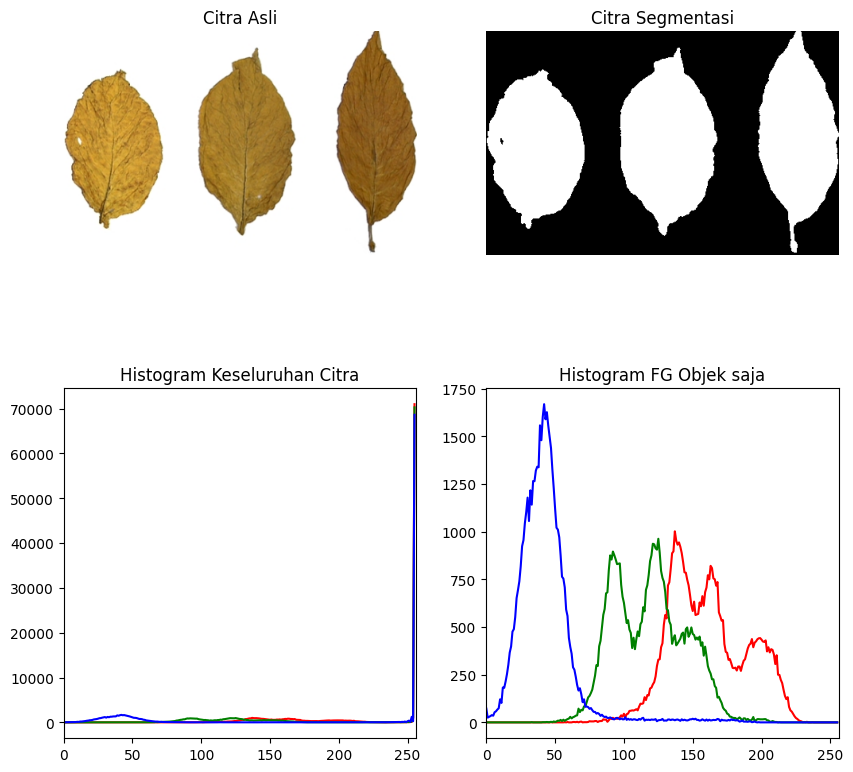

In [ ]:
tobacco = ('/content/drive/MyDrive/Images/Tobacco.jpg')
img_l = cv2.imread(tobacco)
img_rgb = cv2.cvtColor(img_l, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Segmentasi dengan threshold (sesuaikan nilai threshold sesuai kebutuhan)
ret3, mask = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

# Menampilkan gambar dan histogram
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2), plt.imshow(mask, 'gray')
plt.title('Citra Segmentasi')
plt.axis('off')

# Warna untuk setiap channel RGB
colors = ('r', 'g', 'b')

# Histogram untuk keseluruhan citra
for i, col in enumerate(colors):
    hist0 = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.subplot(2, 2, 3), plt.plot(hist0, color=col)
    plt.title('Histogram Keseluruhan Citra')
    plt.xlim([0, 256])

# Histogram hanya pada foreground objek (daun) dengan mask
for i, col in enumerate(colors):
    hist1 = cv2.calcHist([img_rgb], [i], mask, [256], [0, 256])
    plt.subplot(2, 2, 4), plt.plot(hist1, color=col)
    plt.title('Histogram FG Objek saja')
    plt.xlim([0, 256])

plt.show()

# **Segmentasi Ambil 1 Warna**

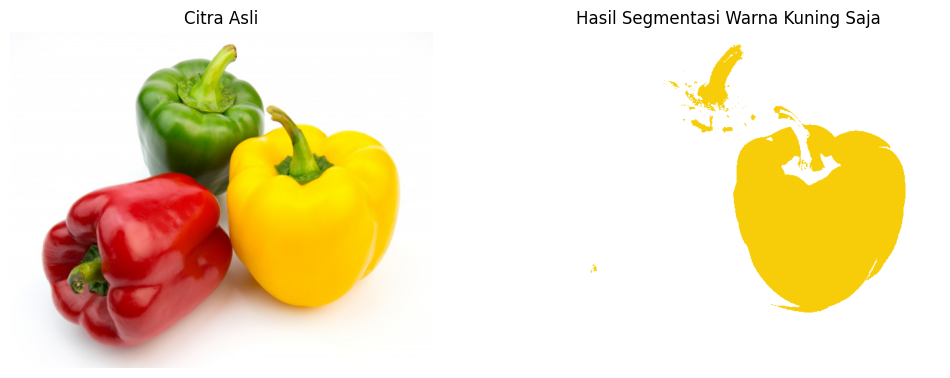

In [ ]:
image_path = '/content/drive/MyDrive/Images/Peppers.jpg'
img = cv2.imread(image_path)

# Mengonversi dari BGR ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mengubah citra menjadi array 2D untuk K-Means
img_data = img_rgb.reshape((-1, 3))
img_data = np.float32(img_data)

# Menentukan k dan kriteria untuk K-Means
k = 3  # Jumlah cluster
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Menerapkan K-Means
_, labels, centers = cv2.kmeans(img_data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengonversi pusat ke integer
centers = np.uint8(centers)

# Membuat citra hasil dari cluster
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_rgb.shape)

# Mengonversi pusat warna menjadi HSV untuk memfilter warna kuning
segmented_hsv = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2HSV)

# Definisikan rentang warna kuning dalam HSV
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Mask untuk warna kuning
mask = cv2.inRange(segmented_hsv, lower_yellow, upper_yellow)

# Buat citra background putih
white_background = np.ones_like(segmented_image) * 255

# Menggunakan mask untuk mendapatkan warna kuning pada background putih
yellow_segmented = cv2.bitwise_and(segmented_image, segmented_image, mask=mask)
background_yellow = np.where(mask[..., None] == 255, yellow_segmented, white_background)

# Menampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(background_yellow)
plt.title('Hasil Segmentasi Warna Kuning Saja')
plt.axis('off')

plt.show()

**Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa
hal itu terjadi.**

Saat menampilkan warna tertentu,  pencahayaan yang tidak merata pada citra dapat menyebabkan variasi warna yang menyulitkan segmentasi. K-Means juga dapat salah mengidentifikasi cluster warna, terutama jika citra mengandung banyak warna campuran.

# **Thresholding Biner**

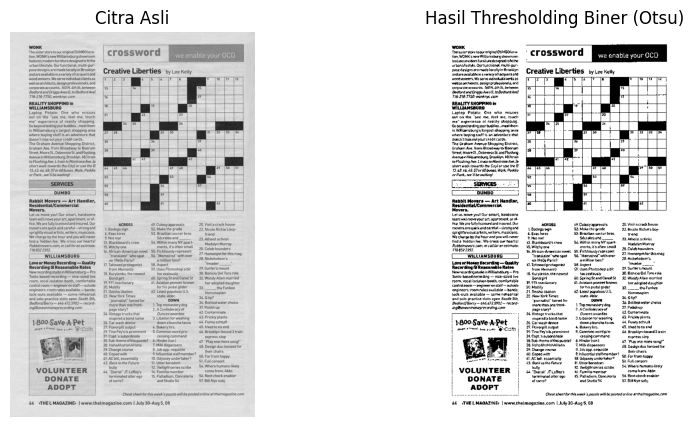

In [ ]:
crossword = '/content/drive/MyDrive/Images/Crossword.jpg'
img = cv2.imread(crossword, cv2.IMREAD_GRAYSCALE)

# Menggunakan Otsu's thresholding untuk mendapatkan threshold terbaik
ret, thresh_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresh_otsu, cmap='gray')
plt.title('Hasil Thresholding Biner (Otsu)')
plt.axis('off')

plt.show()